In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("consolidated_vulnerability_results.csv")
df

,Project_name,Tool_name,CWE_ID,Number_of_Findings,Is_In_CWE_Top_25
0,brpc,cppcheck,398,187,No
1,brpc,cppcheck,563,39,No
2,brpc,cppcheck,704,7,No
3,brpc,cppcheck,570,8,No
4,brpc,cppcheck,686,20,No
...,...,...,...,...,...
79,terminal,flawfinder,119,97,Yes
80,terminal,flawfinder,120,243,No
81,terminal,flawfinder,362,5,Yes
82,terminal,flawfinder,190,3,Yes


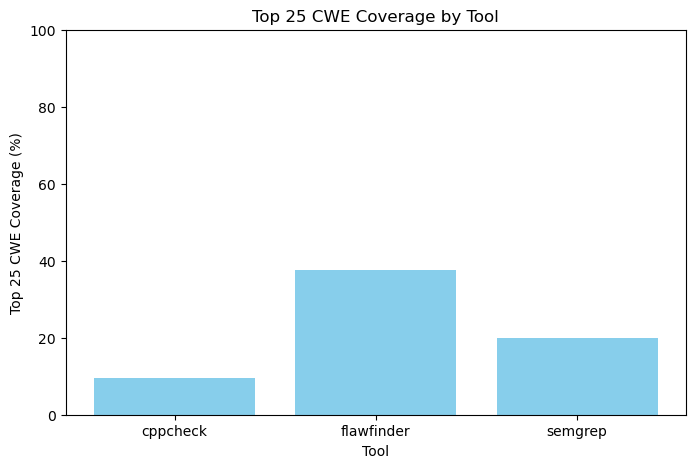

In [3]:
# Extract unique CWE IDs detected by each tool
cwe_by_tool = df.groupby('Tool_name')['CWE_ID'].unique()

# Compute Top 25 CWE coverage (%) at the tool level
coverage = []
for tool, cwe_list in cwe_by_tool.items():
    top25_cwes = df[(df['Tool_name'] == tool) & (df['CWE_ID'].isin(cwe_list)) & (df['Is_In_CWE_Top_25'] == 'Yes')]['CWE_ID'].unique()
    percent = (len(top25_cwes) / len(cwe_list)) * 100 if len(cwe_list) > 0 else 0
    coverage.append({'Tool': tool, 'Top25_Coverage(%)': percent})

coverage_df = pd.DataFrame(coverage)

# Visualize coverage with a bar plot
plt.figure(figsize=(8,5))
plt.bar(coverage_df['Tool'], coverage_df['Top25_Coverage(%)'], color='skyblue')
plt.ylabel('Top 25 CWE Coverage (%)')
plt.xlabel('Tool')
plt.title('Top 25 CWE Coverage by Tool')
plt.ylim(0, 100)
plt.show()

In [4]:
coverage_df

,Tool,Top25_Coverage(%)
0,cppcheck,9.52381
1,flawfinder,37.50000
2,semgrep,20.00000


,cppcheck,flawfinder,semgrep
cppcheck,1.000000,0.027778,0.000000
flawfinder,0.027778,1.000000,0.083333
semgrep,0.000000,0.083333,1.000000


<Axes: >

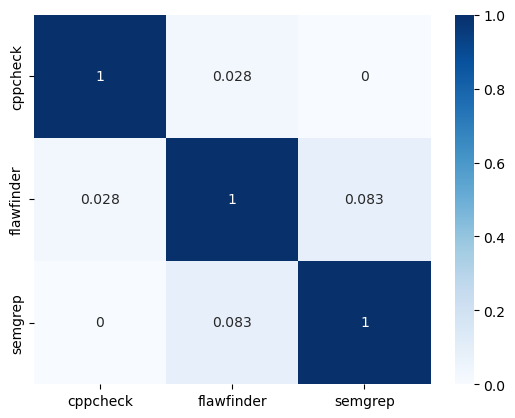

In [5]:
# Get unique CWE IDs detected by each tool as sets
cwe_by_tool = df.groupby('Tool_name')['CWE_ID'].unique().apply(set)

# List of tool names
tools = list(cwe_by_tool.index)

# Initialize IoU matrix
import numpy as np
iou_matrix = np.zeros((len(tools), len(tools)))

# Compute IoU for each tool pair
for i, tool1 in enumerate(tools):
    for j, tool2 in enumerate(tools):
        set1 = cwe_by_tool[tool1]
        set2 = cwe_by_tool[tool2]
        intersection = len(set1 & set2)
        union = len(set1 | set2)
        iou = intersection / union if union > 0 else 0
        iou_matrix[i, j] = iou

# Create DataFrame for better display
iou_df = pd.DataFrame(iou_matrix, index=tools, columns=tools)
display(iou_df)

import seaborn as sns
sns.heatmap(iou_df, annot=True, cmap='Blues')


QN-Interpret the Matrix: along the lines of Jaccard Index (IoU), what insights can
you obtain about similarity/diversity of tools based on the vulnerability
analysis results?

Ans- The pairwise IoU values between tools were low (0.0–0.08), indicating limited overlap in CWE detection.
This suggests that each tool identifies distinct categories of vulnerabilities, likely due to differences in their analysis techniques and rule bases. Consequently, using multiple static analysis tools in combination can provide broader coverage of weaknesses. 

QN-Explain the Matrix: which tool combination maximizes CWE coverage? What
are the takeaways of your analyses?

Ans- Flawfinder maximises the top 25 cwe coverage(37.5%) whereas Semgrep's 20% cwe id's consist of top 25 and 9.5% of Cppcheck's cwe ids are of top 25, we can observe that each tool targets different categories of vulnerabilities. Some tools focus on the CWE Top 25 weaknesses, while others specialize in narrower or specific issues. This indicates that no single tool provides comprehensive coverage, and combining multiple static analysis tools can lead to broader and more effective vulnerability detection across diverse CWE categories.